<a href="https://colab.research.google.com/github/eemilaaltosetala/Projects/blob/main/DemoTensorflowKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import print_function
import tensorflow.keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#luokkien nimet
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#ladataan data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
# näytetään datan dimensiot -> pitäisi olla:
# opetusdataa 60000 kuvaa (28x28) ja niiden luokat sekä testidatana 10000 kuvaa ja niiden luokat
print('Opetusdata:', x_train.shape, y_train.shape)
print('Testidata:', x_test.shape, y_test.shape)

Opetusdata: (60000, 28, 28) (60000,)
Testidata: (10000, 28, 28) (10000,)


In [6]:
#skaalataan kuva arvot (samalla tyyppi vaihtuu)
x_train = x_train / 255.0
x_test = x_test / 255.0

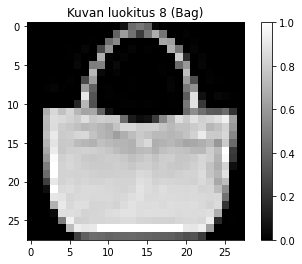

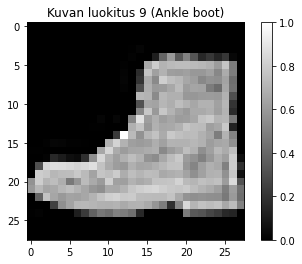

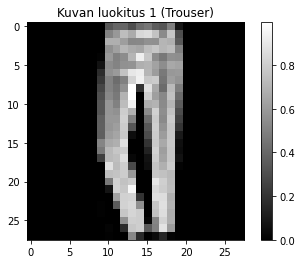

In [7]:
# otetaan muutama kuva ja katsotaan miltä ne näyttävät
def show_training_image(index):
  img_label = str(y_train[index]) + ' (' + class_names[y_train[index]] + ')'
  plt.figure()
  plt.title('Kuvan luokitus ' + img_label)
  plt.imshow(x_train[index], cmap='gray')
  plt.colorbar()
  plt.show()

img_index = 100
show_training_image(img_index)
img_index = 208
show_training_image(img_index)
img_index = 307
show_training_image(img_index)

In [8]:
# eteenpäin syöttävä neuroverkko
model = Sequential()
model.add(Flatten(input_shape=(28,28)))    #prosessoidaan syöte vektoriksi 28 x 28 --> 784 arvoa (ei neuroneita)
model.add(Dense(128, activation='relu', name='piilokerros-128-relu'))    # 128 neuronia yhdistettynö jokaiseen 784 pikseliin (syötearvoihin)
model.add(Dense(10, activation='softmax', name='tuloskerros-10-softmax'))   # 10 luokka-arvon todennäköisyydet

In [9]:
# näytetään mallin rakenne
print('Syötteen muoto:', x_train.shape)
print()
print(model.summary())

Syötteen muoto: (60000, 28, 28)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 piilokerros-128-relu (Dense  (None, 128)              100480    
 )                                                               
                                                                 
 tuloskerros-10-softmax (Den  (None, 10)               1290      
 se)                                                             
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
# mallin optimointi
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
hist = model.fit(x_train, y_train, epochs=40)   #epochs = opetuskierroksien määrä

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4948 - accuracy: 0.8255
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3745 - accuracy: 0.8661
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3376 - accuracy: 0.8762
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3118 - accuracy: 0.8860
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2953 - accuracy: 0.8922
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2811 - accuracy: 0.8957
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2687 - accuracy: 0.8993
Epoch 8/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2561 - accuracy: 0.9043
Epoch 9/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2489 - accuracy: 0.9092
Epoch 10/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.241

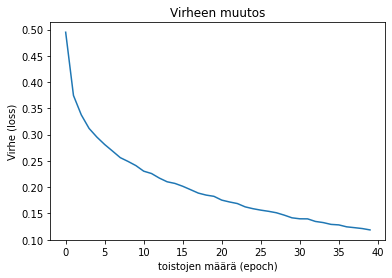

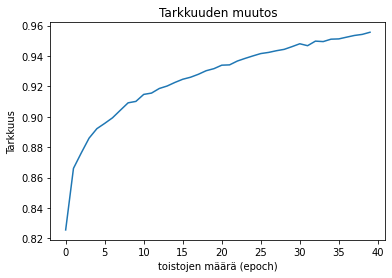

In [12]:
def plot_acc(hist):
  plt.title('Tarkkuuden muutos')
  plt.plot(hist.history['accuracy'])
  plt.ylabel('Tarkkuus')
  plt.xlabel('toistojen määrä (epoch)')
  plt.show()

def plot_loss(hist):
  plt.title('Virheen muutos')
  plt.plot(hist.history['loss'])
  plt.ylabel('Virhe (loss)')
  plt.xlabel('toistojen määrä (epoch)')
  plt.show()

plot_loss(hist)
plot_acc(hist)



In [13]:
# suurin mahdollinen tarkkuus
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)

print('max opetusdatan tarkkuus:', max(hist.history['accuracy']), 'testidatan tarkkuus:', test_acc)

max opetusdatan tarkkuus: 0.9556499719619751 testidatan tarkkuus: 0.8866000175476074


In [14]:
# muutetaan mallia
# vähennetään piilokerroksen neuronien määrää 128 -> 64
model = Sequential()
model.add(Flatten(input_shape=(28,28)))    #prosessoidaan syöte vektoriksi 28 x 28 --> 784 arvoa (ei neuroneita)
model.add(Dense(64, activation='relu', name='piilokerros-64-relu'))    # 64 neuronia yhdistettynö jokaiseen 784 pikseliin (syötearvoihin)
model.add(Dense(10, activation='softmax', name='tuloskerros-10-softmax'))  #10 luokka-arvon todennäköisyydet

# konfiguroidaan malli
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#opetetaan ja validoidaan testidatalla
hist = model.fit(x_train, y_train, epochs=40,
                 validation_data=(x_test, y_test))

Epoch 1/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5238 - accuracy: 0.8200 - val_loss: 0.4499 - val_accuracy: 0.8408
Epoch 2/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3968 - accuracy: 0.8598 - val_loss: 0.4036 - val_accuracy: 0.8571
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3587 - accuracy: 0.8718 - val_loss: 0.4247 - val_accuracy: 0.8481
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3303 - accuracy: 0.8805 - val_loss: 0.3771 - val_accuracy: 0.8651
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3126 - accuracy: 0.8853 - val_loss: 0.3756 - val_accuracy: 0.8643
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3001 - accuracy: 0.8903 - val_loss: 0.3616 - val_accuracy: 0.8722
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2886 - accuracy: 0.8938 - val_loss: 0.3620 - val_accuracy:

In [15]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 piilokerros-64-relu (Dense)  (None, 64)               50240     
                                                                 
 tuloskerros-10-softmax (Den  (None, 10)               650       
 se)                                                             
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
# toteutetaan early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=4)

In [17]:
#opetetaan ja validoidaan testidatalla, lisätty early stopping callback
hist = model.fit(x_train, y_train, epochs=40,
                 validation_data=(x_test, y_test),
                 callbacks=[early_stopping_callback])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1547 - accuracy: 0.9420 - val_loss: 0.4271 - val_accuracy: 0.8800
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1551 - accuracy: 0.9423 - val_loss: 0.4153 - val_accuracy: 0.8792
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1532 - accuracy: 0.9420 - val_loss: 0.4248 - val_accuracy: 0.8841
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1497 - accuracy: 0.9446 - val_loss: 0.4135 - val_accuracy: 0.8823
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1490 - accuracy: 0.9445 - val_loss: 0.4339 - val_accuracy: 0.8829
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1463 - accuracy: 0.9449 - val_loss: 0.4647 - val_accuracy: 0.8791
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1453 - accuracy: 0.9457 - val_loss: 0.4527 - val_accuracy:

In [18]:
# muutetaan alkuperäistä mallia
#jätetään satunnaisesti pois joitain neuroneita
model = Sequential()
model.add(Flatten(input_shape=(28,28)))    #prosessoidaan syöte vektoriksi 28 x 28 --> 784 arvoa (ei neuroneita)
model.add(Dense(128, activation='relu', name='piilokerros-128-relu'))    # 128 neuronia yhdistettynö jokaiseen 784 pikseliin (syötearvoihin)
model.add(Dropout(0.2))  # pudotetaam neuroneista 20% pois (eli 128*0.2 = 25.6 = 25 neuronia)
model.add(Dense(10, activation='softmax', name='tuloskerros-10-softmax'))  #10 luokka-arvon todennäköisyydet

# konfiguroidaan malli
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# opetetaan ja validoidaan testidatalla
hist = model.fit(x_train, y_train, epochs=40,
                 validation_data=(x_test, y_test),
                 callbacks=[early_stopping_callback])


Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5350 - accuracy: 0.8111 - val_loss: 0.4445 - val_accuracy: 0.8361
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4022 - accuracy: 0.8543 - val_loss: 0.4081 - val_accuracy: 0.8517
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3674 - accuracy: 0.8660 - val_loss: 0.3857 - val_accuracy: 0.8638
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3489 - accuracy: 0.8710 - val_loss: 0.3950 - val_accuracy: 0.8566
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3321 - accuracy: 0.8770 - val_loss: 0.3658 - val_accuracy: 0.8666
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3225 - accuracy: 0.8805 - val_loss: 0.3516 - val_accuracy: 0.8744
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3085 - accuracy: 0.8851 - val_loss: 0.3465 - val_accuracy: